In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
os.chdir(r"G:\Araki\SMSigxModel\analysis\9_plot_code")
in_path = r"..\6_out\Mahurangi"
out_path = r"..\10_plot"

senario_names = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']
senario_short_names = ['Reference', 'None', 'None', 'SM magnitude', 'SM timings']

In [46]:
results_tot_metrics = pd.read_csv(os.path.join(in_path, 'ws2_ex0.1', 'evaluations.csv'), index_col=0)
results_tot_metrics['bias_in_seasonsig_dates_max'] = results_tot_metrics[['season_transition_dry2wet_s', 'season_transition_dry2wet_e','season_transition_wet2dry_s','season_transition_wet2dry_e']].max(axis='columns')
results_tot_metrics

,KGE on Flow,KGE on Soil Moisture Content,season_transition_dry2wet_s,season_transition_dry2wet_e,season_transition_wet2dry_s,season_transition_wet2dry_e,bias_in_seasonsig_dates_max
0,0.400282,0.665830,3.921362,28.930663,0.841272,11.913097,28.930663
1,-0.791185,-0.024759,13.825331,11.704775,59.977137,59.884437,59.977137
2,0.161148,0.009406,10.947504,10.654839,18.379927,38.067624,38.067624
3,0.394207,0.505443,10.086642,19.460134,14.449281,33.783303,33.783303
4,0.022968,0.266165,24.572352,33.414238,38.816697,34.097108,38.816697
...,...,...,...,...,...,...,...
9995,0.471917,0.535567,9.179681,19.246245,10.738245,31.748493,31.748493
9996,0.490736,0.794922,3.547426,27.967998,21.860437,9.230050,27.967998
9997,0.622213,0.434746,9.053449,4.092825,16.240603,36.766260,36.766260
9998,0.115102,0.538344,11.748394,27.939558,20.080222,1.153968,27.939558


In [63]:
eval_criteria = {
    0: {'variable_to_analyze': 'Flow', 'metric': 'KGE', 'threshold': 0.5},
    1: {'variable_to_analyze': 'Soil Moisture Content', 'metric': 'KGE', 'threshold':  0.5},
    2: {'variable_to_analyze': 'Soil Moisture Content', 'metric': 'season_transition', 'threshold': 30}
}
df_eval_metrics = results_tot_metrics

eval_names = []
eval_thresh = []
for i in range(len(eval_criteria)):
    if eval_criteria[i]["metric"] == 'season_transition':
        eval_names.append(
            f'{eval_criteria[i]["metric"]}_dry2wet_s')
        eval_names.append(
            f'{eval_criteria[i]["metric"]}_dry2wet_e')
        eval_names.append(
            f'{eval_criteria[i]["metric"]}_wet2dry_s')
        eval_names.append(
            f'{eval_criteria[i]["metric"]}_wet2dry_e')
        eval_thresh.append(eval_criteria[i]["threshold"])
        eval_thresh.append(eval_criteria[i]["threshold"])
        eval_thresh.append(eval_criteria[i]["threshold"])
        eval_thresh.append(eval_criteria[i]["threshold"])
    else:
        eval_names.append(f'{eval_criteria[i]["metric"]} on {eval_criteria[i]["variable_to_analyze"]}')
        eval_thresh.append(eval_criteria[i]["threshold"])

for i in range(len(eval_names)):
    if ('KGE' in eval_names[i]) or ('NSE' in eval_names[i]):
        df_eval_metrics[eval_names[i]+'_Behavioral'] = (df_eval_metrics[eval_names[i]] > eval_thresh[i])
    elif 'season_transition' in eval_names[i]:
        df_eval_metrics[eval_names[i]+'_Behavioral'] = (df_eval_metrics[eval_names[i]] < eval_thresh[i])
        
df_eval_metrics['bias_in_seasonsig_dates_max'+'_Behavioral'] = (df_eval_metrics['bias_in_seasonsig_dates_max'] < 30)

# glue_judge_column = df_eval_metrics.filter(like='_Behavioral').columns
# df_eval_metrics['GLUE_results_Behavioral'] = df_eval_metrics[glue_judge_column].all(axis='columns')

df_eval_metrics['Senario_Reference'] = df_eval_metrics['KGE on Flow_Behavioral']
print('Senario reference, Number of behavioral runs (n=10000)')
print(df_eval_metrics['Senario_Reference'].value_counts())

df_eval_metrics['Senario_SM_magnitude'] = df_eval_metrics[['KGE on Flow_Behavioral', 'KGE on Soil Moisture Content_Behavioral']].all(axis='columns')
print('\nSenario SM magnitude, Number of behavioral runs (n=10000)')
print(df_eval_metrics['Senario_SM_magnitude'].value_counts())

df_eval_metrics['Senario_SM_timings'] = df_eval_metrics[['KGE on Flow_Behavioral', 'bias_in_seasonsig_dates_max_Behavioral']].all(axis='columns')
print('\nSenario SM timings, Number of behavioral runs (n=10000)')
print(df_eval_metrics['Senario_SM_timings'].value_counts())

Senario reference, Number of behavioral runs (n=10000)
False    6733
True     3267
Name: Senario_Reference, dtype: int64

Senario SM magnitude, Number of behavioral runs (n=10000)
False    8630
True     1370
Name: Senario_SM_magnitude, dtype: int64

Senario SM timings, Number of behavioral runs (n=10000)
False    8856
True     1144
Name: Senario_SM_timings, dtype: int64


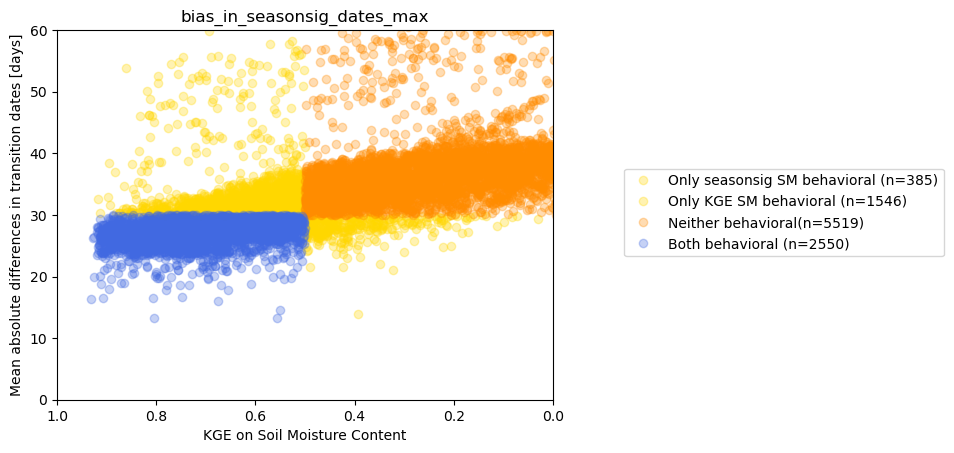

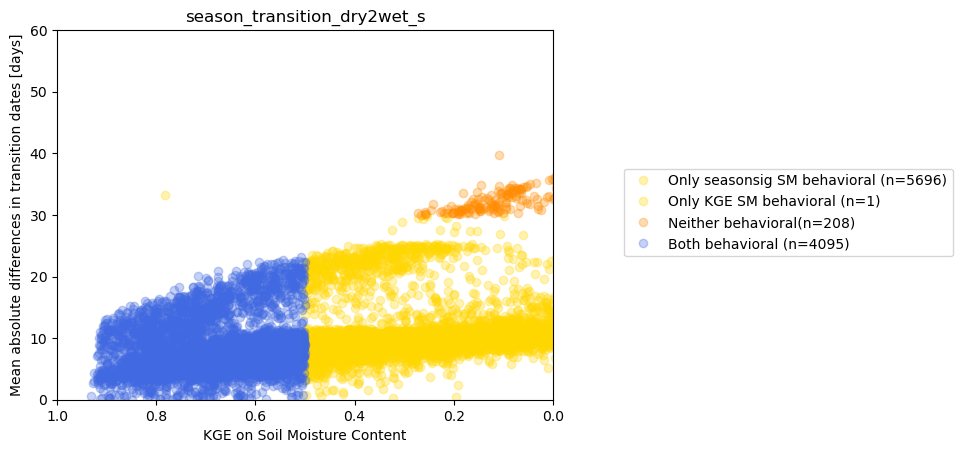

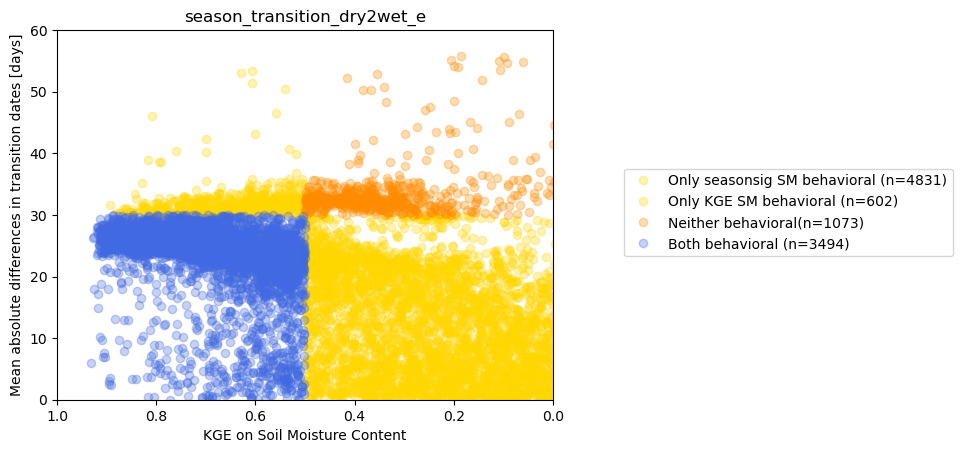

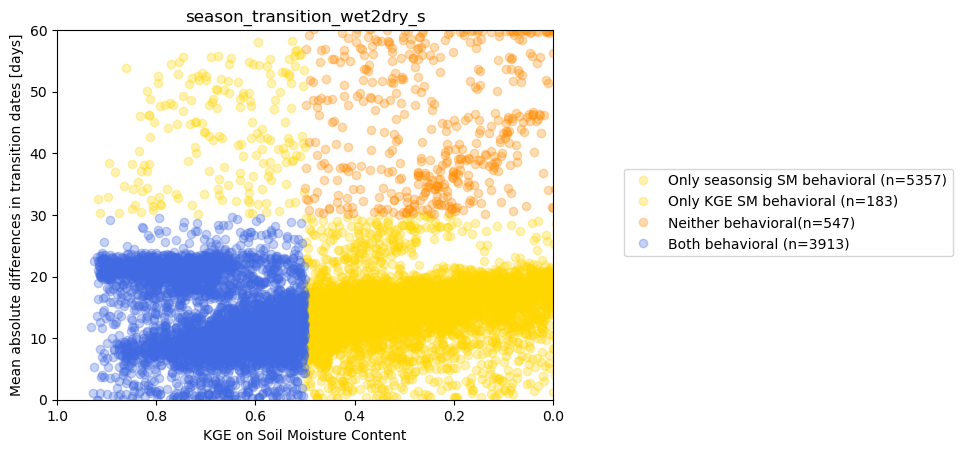

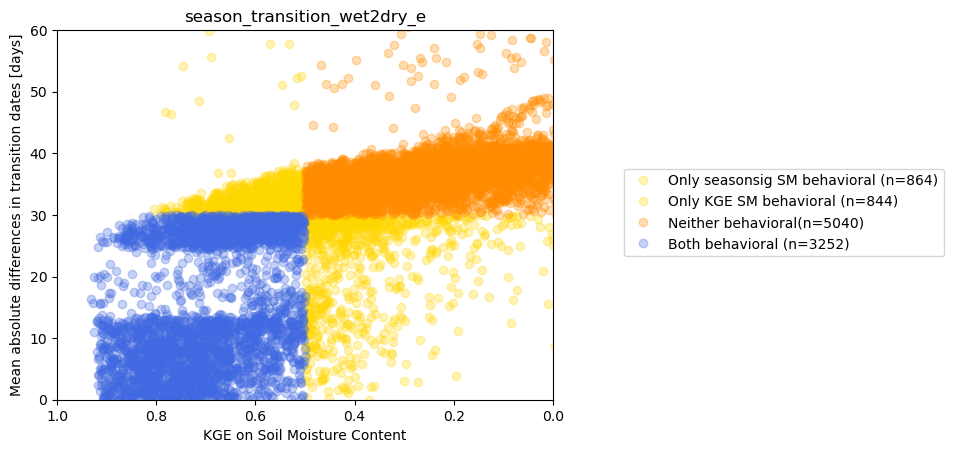

In [67]:
fig_title = ['KGE on Flow', 'KGE on Soil Moisture Content', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']
seasonsig_SM_vars = ['bias_in_seasonsig_dates_max', 'season_transition_dry2wet_s', 'season_transition_dry2wet_e', 'season_transition_wet2dry_s', 'season_transition_wet2dry_e']
for i, seasonsig_var in enumerate(seasonsig_SM_vars):
    fig, ax = plt.subplots()
    x = results_tot_metrics['KGE on Soil Moisture Content'].values
    x_behavioral = results_tot_metrics['KGE on Soil Moisture Content'].values > 0.5
    y = results_tot_metrics[seasonsig_var].values
    y_behavioral = results_tot_metrics[seasonsig_var].values < 30
    
    x_and_y_behavioral = np.logical_and(x_behavioral, y_behavioral)
    only_y_behavioral = np.logical_and(y_behavioral, np.logical_not(x_behavioral))
    only_x_behavioral = np.logical_and(x_behavioral, np.logical_not(y_behavioral))
    neither_behavioral = np.logical_and(np.logical_not(x_behavioral), np.logical_not(y_behavioral))
    
    plt.plot(x[only_y_behavioral], y[only_y_behavioral], 'o', alpha=0.3, color='gold', label=f'Only seasonsig SM behavioral (n={np.count_nonzero(only_y_behavioral)})')
    plt.plot(x[only_x_behavioral], y[only_x_behavioral], 'o', alpha=0.3, color='gold', label=f'Only KGE SM behavioral (n={np.count_nonzero(only_x_behavioral)})')
    plt.plot(x[neither_behavioral], y[neither_behavioral], 'o', alpha=0.3, color='darkorange', label=f'Neither behavioral(n={np.count_nonzero(neither_behavioral)})')
    plt.plot(x[x_and_y_behavioral], y[x_and_y_behavioral], 'o', alpha=0.3, color='royalblue', label=f'Both behavioral (n={np.count_nonzero(x_and_y_behavioral)})')
    ax.set_xlabel('KGE on Soil Moisture Content')
    ax.set_xlim([0, 1])
    ax.set_ylabel('Mean absolute differences in transition dates [days]')
    ax.set_ylim([0, 60])
    ax.set_title(seasonsig_var)
    ax.invert_xaxis()
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'seasonsig_{seasonsig_var}.png'))

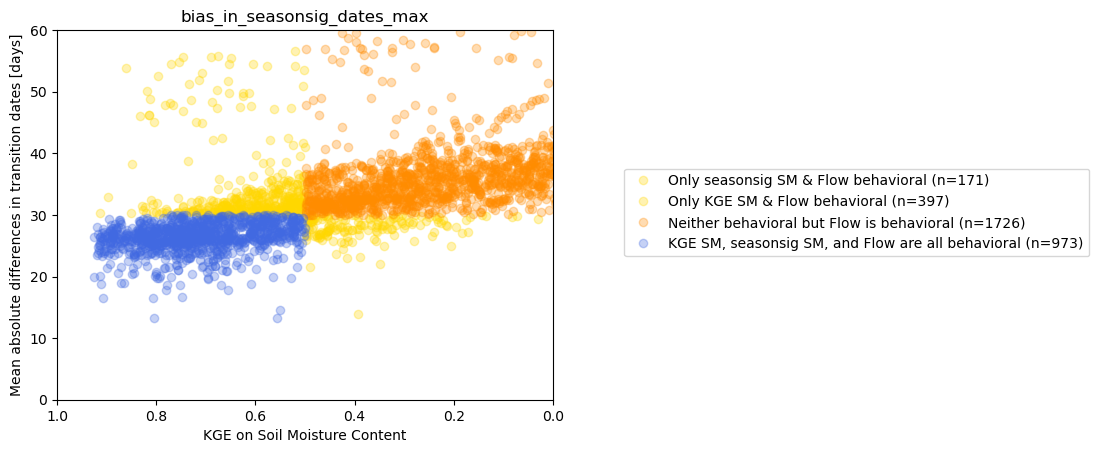

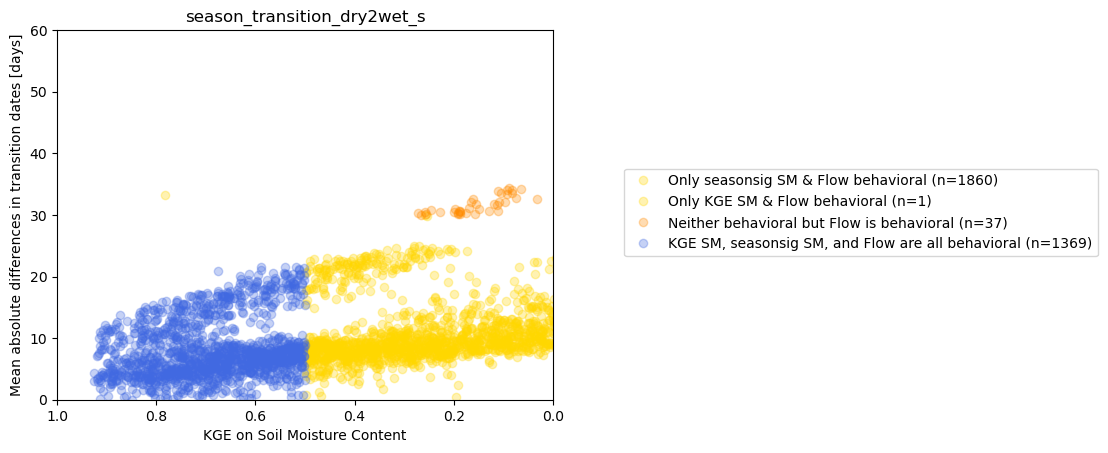

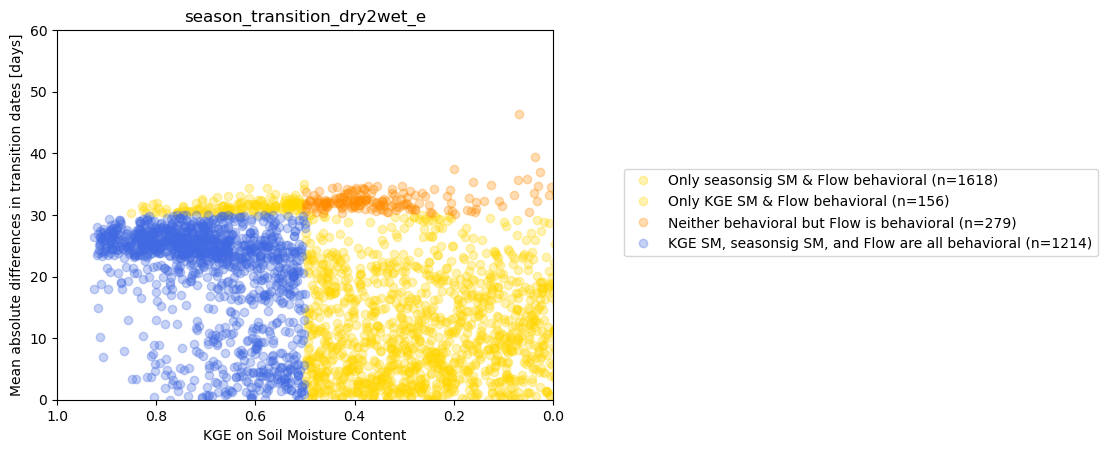

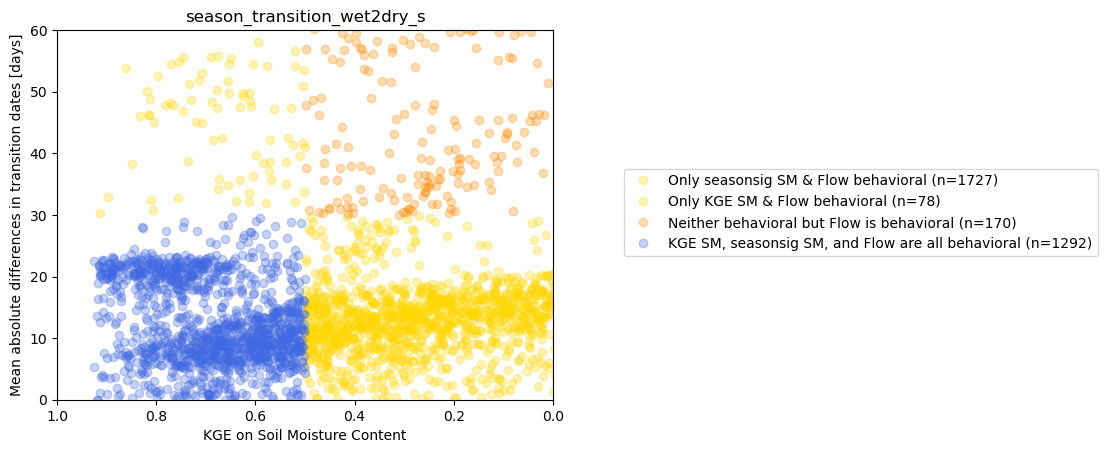

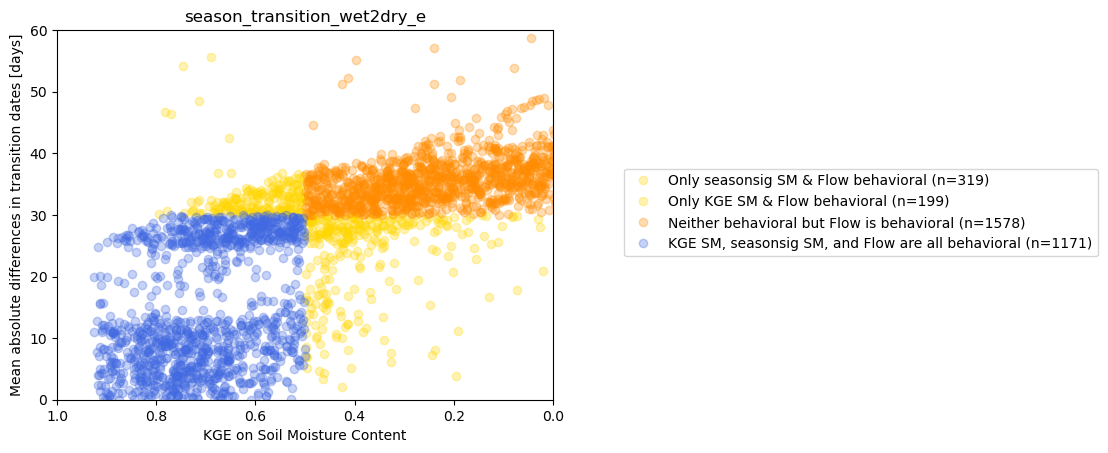

In [72]:
fig_title = ['KGE on Flow', 'KGE on Soil Moisture Content', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']
seasonsig_SM_vars = ['bias_in_seasonsig_dates_max', 'season_transition_dry2wet_s', 'season_transition_dry2wet_e', 'season_transition_wet2dry_s', 'season_transition_wet2dry_e']
for i, seasonsig_var in enumerate(seasonsig_SM_vars):
    fig, ax = plt.subplots()
    x = results_tot_metrics['KGE on Soil Moisture Content'].values
    x_behavioral = results_tot_metrics['KGE on Soil Moisture Content'].values > 0.5
    y = results_tot_metrics[seasonsig_var].values
    y_behavioral = results_tot_metrics[seasonsig_var].values < 30
    flow_behavioral = results_tot_metrics['KGE on Flow'].values > 0.5
    
    x_and_y_behavioral = np.logical_and(flow_behavioral, np.logical_and(x_behavioral, y_behavioral))
    only_y_behavioral = np.logical_and(flow_behavioral,np.logical_and(y_behavioral, np.logical_not(x_behavioral)))
    only_x_behavioral = np.logical_and(flow_behavioral,np.logical_and(x_behavioral, np.logical_not(y_behavioral)))
    neither_behavioral = np.logical_and(flow_behavioral,np.logical_and(np.logical_not(x_behavioral), np.logical_not(y_behavioral)))
    
    plt.plot(x[only_y_behavioral], y[only_y_behavioral], 'o', alpha=0.3, color='gold', label=f'Only seasonsig SM & Flow behavioral (n={np.count_nonzero(only_y_behavioral)})')
    plt.plot(x[only_x_behavioral], y[only_x_behavioral], 'o', alpha=0.3, color='gold', label=f'Only KGE SM & Flow behavioral (n={np.count_nonzero(only_x_behavioral)})')
    plt.plot(x[neither_behavioral], y[neither_behavioral], 'o', alpha=0.3, color='darkorange', label=f'Neither behavioral but Flow is behavioral (n={np.count_nonzero(neither_behavioral)})')
    plt.plot(x[x_and_y_behavioral], y[x_and_y_behavioral], 'o', alpha=0.3, color='royalblue', label=f'KGE SM, seasonsig SM, and Flow are all behavioral (n={np.count_nonzero(x_and_y_behavioral)})')
    ax.set_xlabel('KGE on Soil Moisture Content')
    ax.set_xlim([0, 1])
    ax.set_ylabel('Mean absolute differences in transition dates [days]')
    ax.set_ylim([0, 60])
    ax.set_title(seasonsig_var)
    ax.invert_xaxis()
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'seasonsig_{seasonsig_var}.png'))

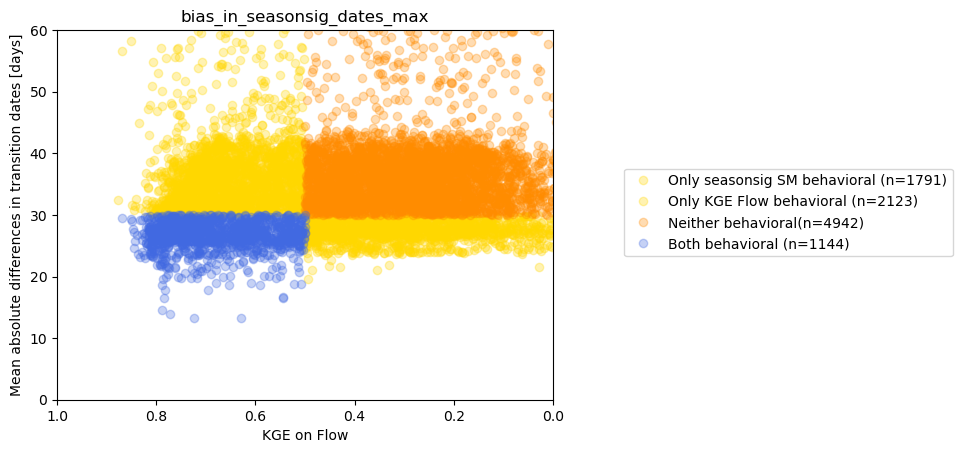

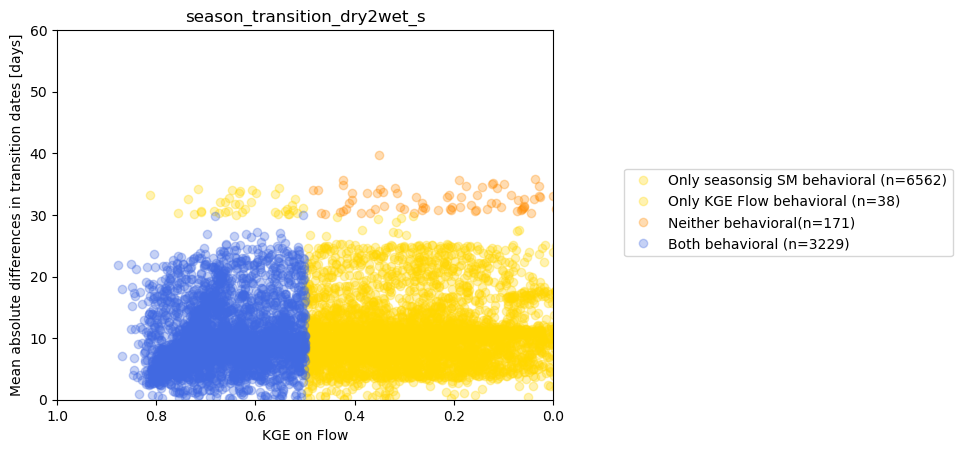

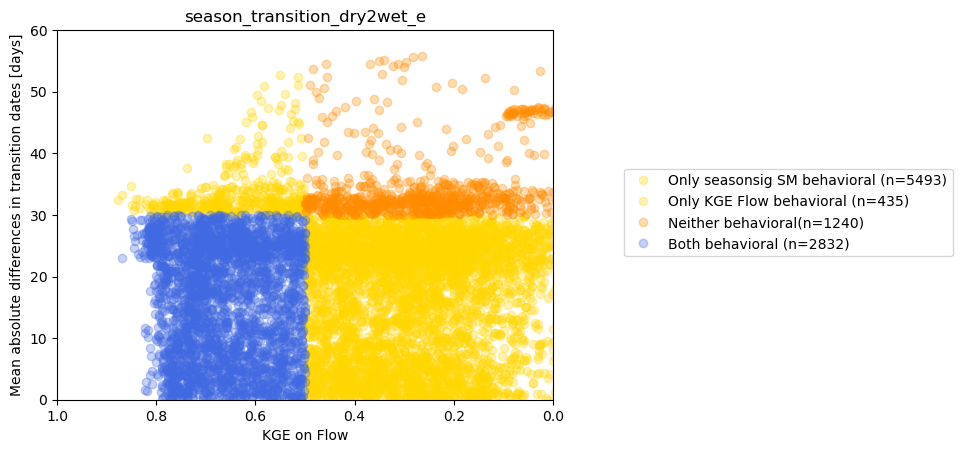

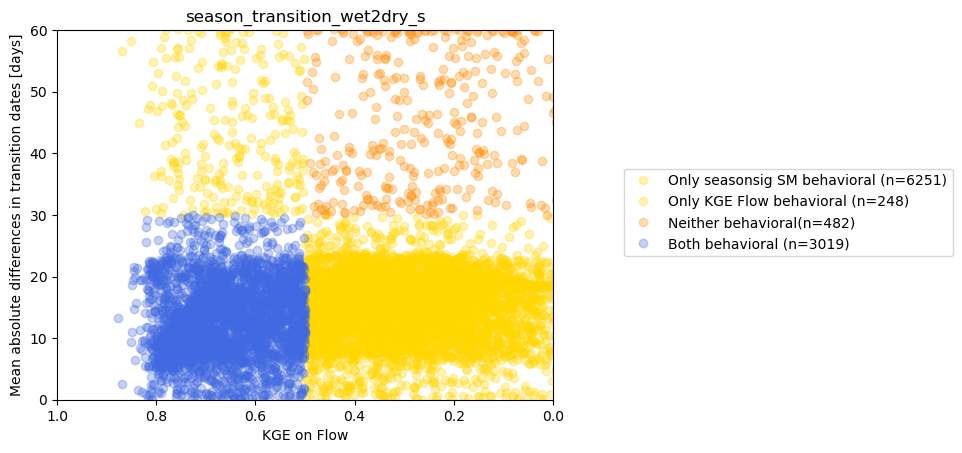

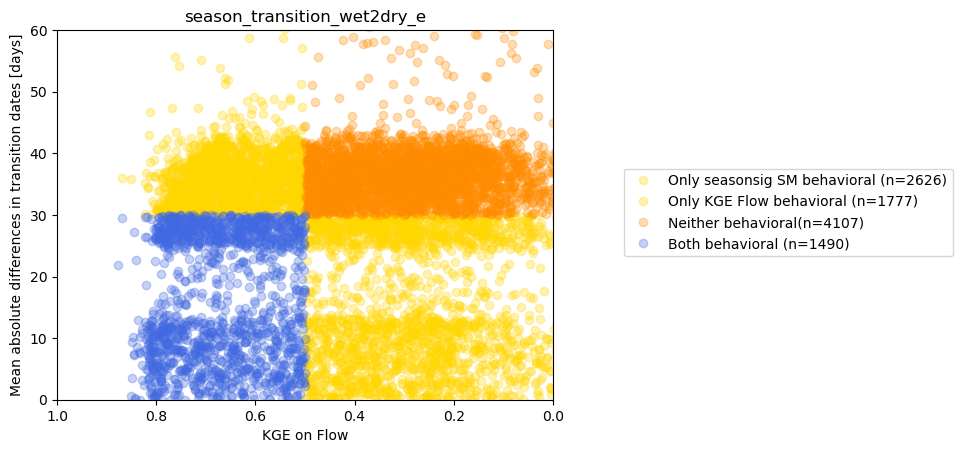

In [69]:
fig_title = ['KGE on Flow', 'KGE on Soil Moisture Content', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']
seasonsig_SM_vars = ['bias_in_seasonsig_dates_max', 'season_transition_dry2wet_s', 'season_transition_dry2wet_e', 'season_transition_wet2dry_s', 'season_transition_wet2dry_e']
for i, seasonsig_var in enumerate(seasonsig_SM_vars):
    fig, ax = plt.subplots()
    x = results_tot_metrics['KGE on Flow'].values
    x_behavioral = results_tot_metrics['KGE on Flow'].values > 0.5
    y = results_tot_metrics[seasonsig_var].values
    y_behavioral = results_tot_metrics[seasonsig_var].values < 30
    
    x_and_y_behavioral = np.logical_and(x_behavioral, y_behavioral)
    only_y_behavioral = np.logical_and(y_behavioral, np.logical_not(x_behavioral))
    only_x_behavioral = np.logical_and(x_behavioral, np.logical_not(y_behavioral))
    neither_behavioral = np.logical_and(np.logical_not(x_behavioral), np.logical_not(y_behavioral))
    
    
    plt.plot(x[only_y_behavioral], y[only_y_behavioral], 'o', alpha=0.3, color='gold', label=f'Only seasonsig SM behavioral (n={np.count_nonzero(only_y_behavioral)})')
    plt.plot(x[only_x_behavioral], y[only_x_behavioral], 'o', alpha=0.3, color='gold', label=f'Only KGE Flow behavioral (n={np.count_nonzero(only_x_behavioral)})')
    plt.plot(x[neither_behavioral], y[neither_behavioral], 'o', alpha=0.3, color='darkorange', label=f'Neither behavioral(n={np.count_nonzero(neither_behavioral)})')
    plt.plot(x[x_and_y_behavioral], y[x_and_y_behavioral], 'o', alpha=0.3, color='royalblue', label=f'Both behavioral (n={np.count_nonzero(x_and_y_behavioral)})')
    
    ax.set_xlabel('KGE on Flow')
    ax.set_xlim([0, 1])
    ax.set_ylabel('Mean absolute differences in transition dates [days]')
    ax.set_ylim([0, 60])
    ax.set_title(seasonsig_var)
    ax.invert_xaxis()
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'seasonsig_{seasonsig_var}.png'))